# Twitter Sentiment Analysis using Machine Learning

In [1]:
#installing kaggle Library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Importing Twitter Sentiment Dataset

In [3]:
# Fetching dataset through API
!kaggle datasets download -d kazanova/sentiment140

 90% 73.0M/80.9M [00:00<00:00, 148MB/s]
100% 80.9M/80.9M [00:00<00:00, 141MB/s]


In [4]:
# extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
# downloading the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Stopwords doesn't add any meaning to the the sentences in ML so we can remove them
# printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Processing

In [ ]:
# importing the dataset

df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv' , encoding = 'ISO-8859-1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# naming the columns

column_names = ['target','id','date','flag','user','text']
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv' , encoding = 'ISO-8859-1' ,names = column_names)

In [ ]:
df.sample(10)

,target,id,date,flag,user,text
1005555,4,1880523574,Fri May 22 01:32:56 PDT 2009,NO_QUERY,ericathompson,I think im tired enough now 2 go 2 sleep. mayb...
1336229,4,2017192996,Wed Jun 03 08:00:21 PDT 2009,NO_QUERY,MosesChang,"@tx_tine Awesome, you know I always love free ..."
339570,0,2014668126,Wed Jun 03 02:17:20 PDT 2009,NO_QUERY,MrGilder,"Well, finally moved - no broadband at home for..."
813235,4,1548728665,Fri Apr 17 21:47:34 PDT 2009,NO_QUERY,dannytatom,@LoveInColor Congrats on the house!
1562045,4,2186741145,Mon Jun 15 19:16:12 PDT 2009,NO_QUERY,PattyGago,sushi timeeeee
869023,4,1678052511,Sat May 02 05:17:18 PDT 2009,NO_QUERY,ChicChica,just woke upp . . . bout 2 make a baqelll .
1187231,4,1983120435,Sun May 31 12:32:36 PDT 2009,NO_QUERY,clairebodenham,@camillabetty damn straight it is! who needs q...
635077,0,2233506402,Thu Jun 18 21:27:37 PDT 2009,NO_QUERY,nattyred,no longer in millie i forgot about nicole's w...
575511,0,2211069956,Wed Jun 17 12:23:37 PDT 2009,NO_QUERY,TashMusic,"I told the woman, no I don't want tempura ches..."
1588842,4,2191147876,Tue Jun 16 04:37:58 PDT 2009,NO_QUERY,annelienaes,@squarespace is arraging a great campaign #Squ...


In [9]:
# counting missing values
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [10]:
# checking the distribution of target column
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Convert the taget "4" to "1"

In [11]:
df.replace({'target':{4:1}} , inplace=True)
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Data Visualization of Target Variables

<Axes: xlabel='target', ylabel='count'>

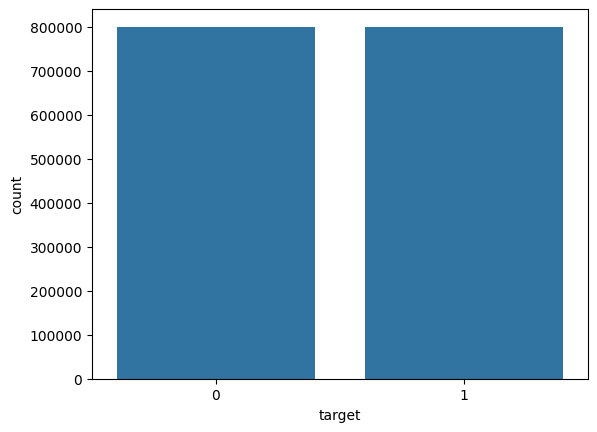

In [18]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
# Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [25]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [27]:
dataset = pd.concat([data_pos, data_neg])

0 =  Negative Tweet

1 =  Positive Tweet

**Stemmin**

In [29]:
port_stem = PorterStemmer()

In [30]:
 def stem(text):
  stem_content = re.sub('[^a-zA-Z]', ' ', text) # if words is a special character or number it will be removed
  stem_content = stem_content.lower() # word will be converted to lower case
  stem_content = stem_content.split() # word will be split
  stem_content = [port_stem.stem(word) for word in stem_content if not word in stopwords.words('english')] # this will remove all stemming words
  stem_content = ' '.join(stem_content)
  return stem_content

In [32]:
dataset['stemmed_content'] = dataset['text'].apply(stem) # takes a lot of time

In [37]:
dataset.sample(10)

,text,target,stemmed_content
1004433,Square cups on odd nights and round cups on ev...,1,squar cup odd night round cup even night tell ...
267967,My phone is dead. Blackberry storm os update f...,0,phone dead blackberri storm os updat fail
271298,@sillymoovicky,0,sillymoovicki
28171,@katiemelone i know,0,katiemelon know
948934,Mmm... Flannel pajamas are one of the small jo...,1,mmm flannel pajama one small joy life
538972,shit hapens...but today lots of happend in my ...,0,shit hapen today lot happend life
1105379,ask to have my account. okaaaaay,1,ask account okaaaaay
13390,"@ErinEven Oh I understand, it's happened to me...",0,erineven oh understand happen never forgot tel...
187428,", hmm ï¿½ theres something wrong on my twitter...",0,hmm there someth wrong twitter account pictur ...
1394867,dress rehearsal alllllll dayyyyy,1,dress rehears alllllll dayyyyy


In [38]:
# converting this dataFrame to csv file for backup
dataset.to_csv('output.csv', encoding='utf-8')

In [40]:
#Separating the data and label
x = dataset['stemmed_content'].values
y = dataset['target'].values

Splitting the data to traning and test data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y , random_state=2)

In [42]:
print(x.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [43]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


Converting the textual data to numerical data

In [44]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Traning the M.L Model

**SVC**

In [53]:
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)

LinearSVC()

Model Evaluation

In [58]:
# accuracy score on the testing data
y_pred = SVCmodel.predict(X_test)
test_acc = accuracy_score(y_test, X_test_pred)

# accuracy score on the training data
X_train_pred = SVCmodel.predict(X_train)
train_acc = accuracy_score(y_train, X_train_pred)

In [59]:
print("Accuracy of training Data - ", train_acc , "\nAccuracy of test data - ", test_acc)


Accuracy of training Data -  0.862340625 
Accuracy of test data -  0.769675
